In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import numpy as np
import cmocean

In [10]:
data = xr.open_dataset('data-temp.nc')
data = data['analysed_sst'].sel(lat=slice(30,45), lon=slice(-80,-40)).isel(time=0)

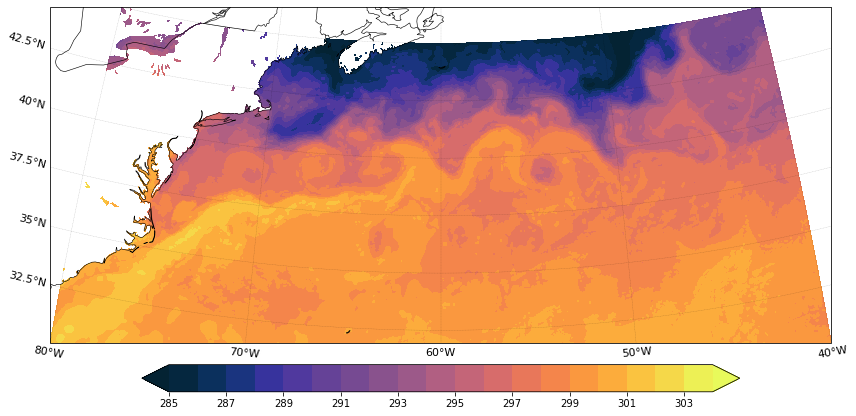

In [12]:
fig = plt.figure(figsize = (14,10))                                       
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=300, 
                                           central_latitude=40)) # Use map background
ax.set_extent([280,320,30,45], crs=ccrs.PlateCarree())
ax.coastlines(linewidth=.6) 
ax.add_feature(cfeature.BORDERS, zorder=1, linewidth=.6)
gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=.3, linewidth=.3, color='k', zorder=1.05)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 11}
gl.ylabel_style = {'size': 11}
cp = ax.contourf(data.lon, data.lat, data, transform=ccrs.PlateCarree(), cmap='cmo.thermal',
                levels=np.arange(285,305,1), extend='both')
cb = fig.colorbar(cp,  orientation='horizontal', fraction=.05, pad=.04)